# **LunarLaunch - Deep QLearning**

The implementation of Deep QLearning for LunarLunch v2.



## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [2]:
from sim.GymTrainer import GymTrainer
from framework.DeepQLearning import DeepQLearning

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/rtu/miniconda3/envs/rlpg/lib/python3.12/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
# Create the simulation environment
sim = GymTrainer(
    'CartPole-v1', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=4,
    maxEpisode=5000,
    batchSize=16,
    maxStep=100000,
    stepLimitPenalty=0,
    seed=543)

=============Initializing=============
Initializing Gym Environments of CartPole-v1
init envs
set seeds 543


In [4]:
# Create the agent
agent = DeepQLearning(
    actionNum=2, 
    stateNum=4, 
    gamma=1.0, 
    qNetLR=0.01)

## Training

In [5]:
name, writer = sim.makeSummaryWriter(agent)
sim.train(agent, writer)

=============Start Training=============
Batch:1 	 Episode:17 	 Loss: 0.99 	 AvgRew: 17.47 	 FinRew: 1.00
Batch:2 	 Episode:33 	 Loss: 0.98 	 AvgRew: 24.06 	 FinRew: 1.00
Batch:3 	 Episode:49 	 Loss: 0.96 	 AvgRew: 21.62 	 FinRew: 1.00
Batch:4 	 Episode:65 	 Loss: 0.94 	 AvgRew: 20.81 	 FinRew: 1.00
Batch:5 	 Episode:81 	 Loss: 0.96 	 AvgRew: 29.06 	 FinRew: 1.00
Batch:6 	 Episode:97 	 Loss: 0.93 	 AvgRew: 22.56 	 FinRew: 1.00
Batch:7 	 Episode:113 	 Loss: 0.93 	 AvgRew: 28.06 	 FinRew: 1.00
Batch:8 	 Episode:129 	 Loss: 0.90 	 AvgRew: 19.81 	 FinRew: 1.00
Batch:9 	 Episode:145 	 Loss: 0.90 	 AvgRew: 24.31 	 FinRew: 1.00
Batch:10 	 Episode:161 	 Loss: 0.85 	 AvgRew: 20.81 	 FinRew: 1.00
Batch:11 	 Episode:177 	 Loss: 0.86 	 AvgRew: 27.81 	 FinRew: 1.00
Batch:12 	 Episode:193 	 Loss: 0.86 	 AvgRew: 24.56 	 FinRew: 1.00
Batch:13 	 Episode:209 	 Loss: 0.84 	 AvgRew: 19.06 	 FinRew: 1.00
Batch:14 	 Episode:225 	 Loss: 0.87 	 AvgRew: 24.56 	 FinRew: 1.00
Batch:15 	 Episode:241 	 Loss: 0.87 

## Testing

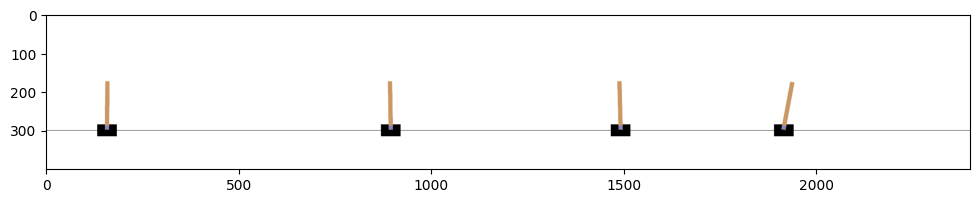

Average Total Reward:61.66666793823242 	 Max Total Reward:215.0 	 Min Total Reward:11.0


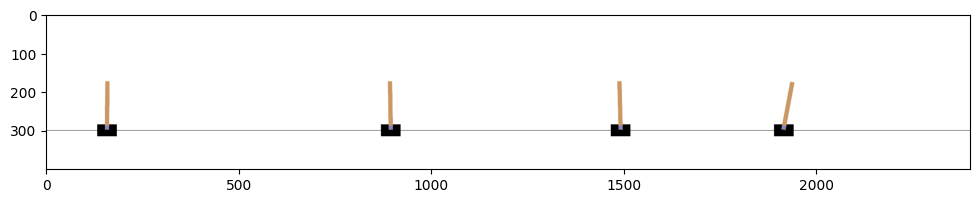

In [6]:
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)

## Save

In [7]:
agent.save(name)

DeepQLearning(
  (qnet): QNetwork(
    (fc1): Linear(in_features=4, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=2, bias=True)
  )
)